In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 

In [3]:
print(X.shape)
print(y.shape)

print(X)
print(y)

(569, 30)
(569, 1)
     radius1  texture1  perimeter1   area1  smoothness1  compactness1  \
0      17.99     10.38      122.80  1001.0      0.11840       0.27760   
1      20.57     17.77      132.90  1326.0      0.08474       0.07864   
2      19.69     21.25      130.00  1203.0      0.10960       0.15990   
3      11.42     20.38       77.58   386.1      0.14250       0.28390   
4      20.29     14.34      135.10  1297.0      0.10030       0.13280   
..       ...       ...         ...     ...          ...           ...   
564    21.56     22.39      142.00  1479.0      0.11100       0.11590   
565    20.13     28.25      131.20  1261.0      0.09780       0.10340   
566    16.60     28.08      108.30   858.1      0.08455       0.10230   
567    20.60     29.33      140.10  1265.0      0.11780       0.27700   
568     7.76     24.54       47.92   181.0      0.05263       0.04362   

     concavity1  concave_points1  symmetry1  fractal_dimension1  ...  radius3  \
0       0.30010        

In [4]:
# Checking for missing values
X.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
dtype: int64

C:\Users\mm243067m\AppData\Local\Temp\ipykernel_13336\1199548407.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y['Diagnosis']=y['Diagnosis'].replace({'M':1, 'B':0})
C:\Users\mm243067m\AppData\Local\Temp\ipykernel_13336\1199548407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Diagnosis']=y['Diagnosis'].replace({'M':1, 'B':0})


     Diagnosis
0            1
1            1
2            1
3            1
4            1
..         ...
564          1
565          1
566          1
567          1
568          0

[569 rows x 1 columns]
Diagnosis
0    0.627417
1    0.372583
Name: proportion, dtype: float64


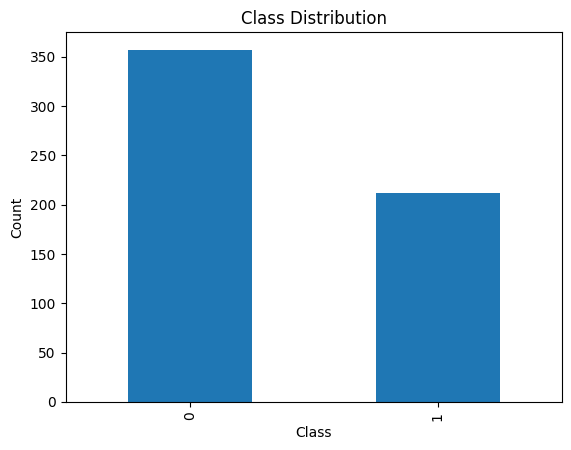

In [5]:
# Coding y such that M is 1 and B is 0
y['Diagnosis']=y['Diagnosis'].replace({'M':1, 'B':0})

print(y)

# Checking if classes are balanced
count=y['Diagnosis'].value_counts()
count.plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")

print(y['Diagnosis'].value_counts(normalize=True))



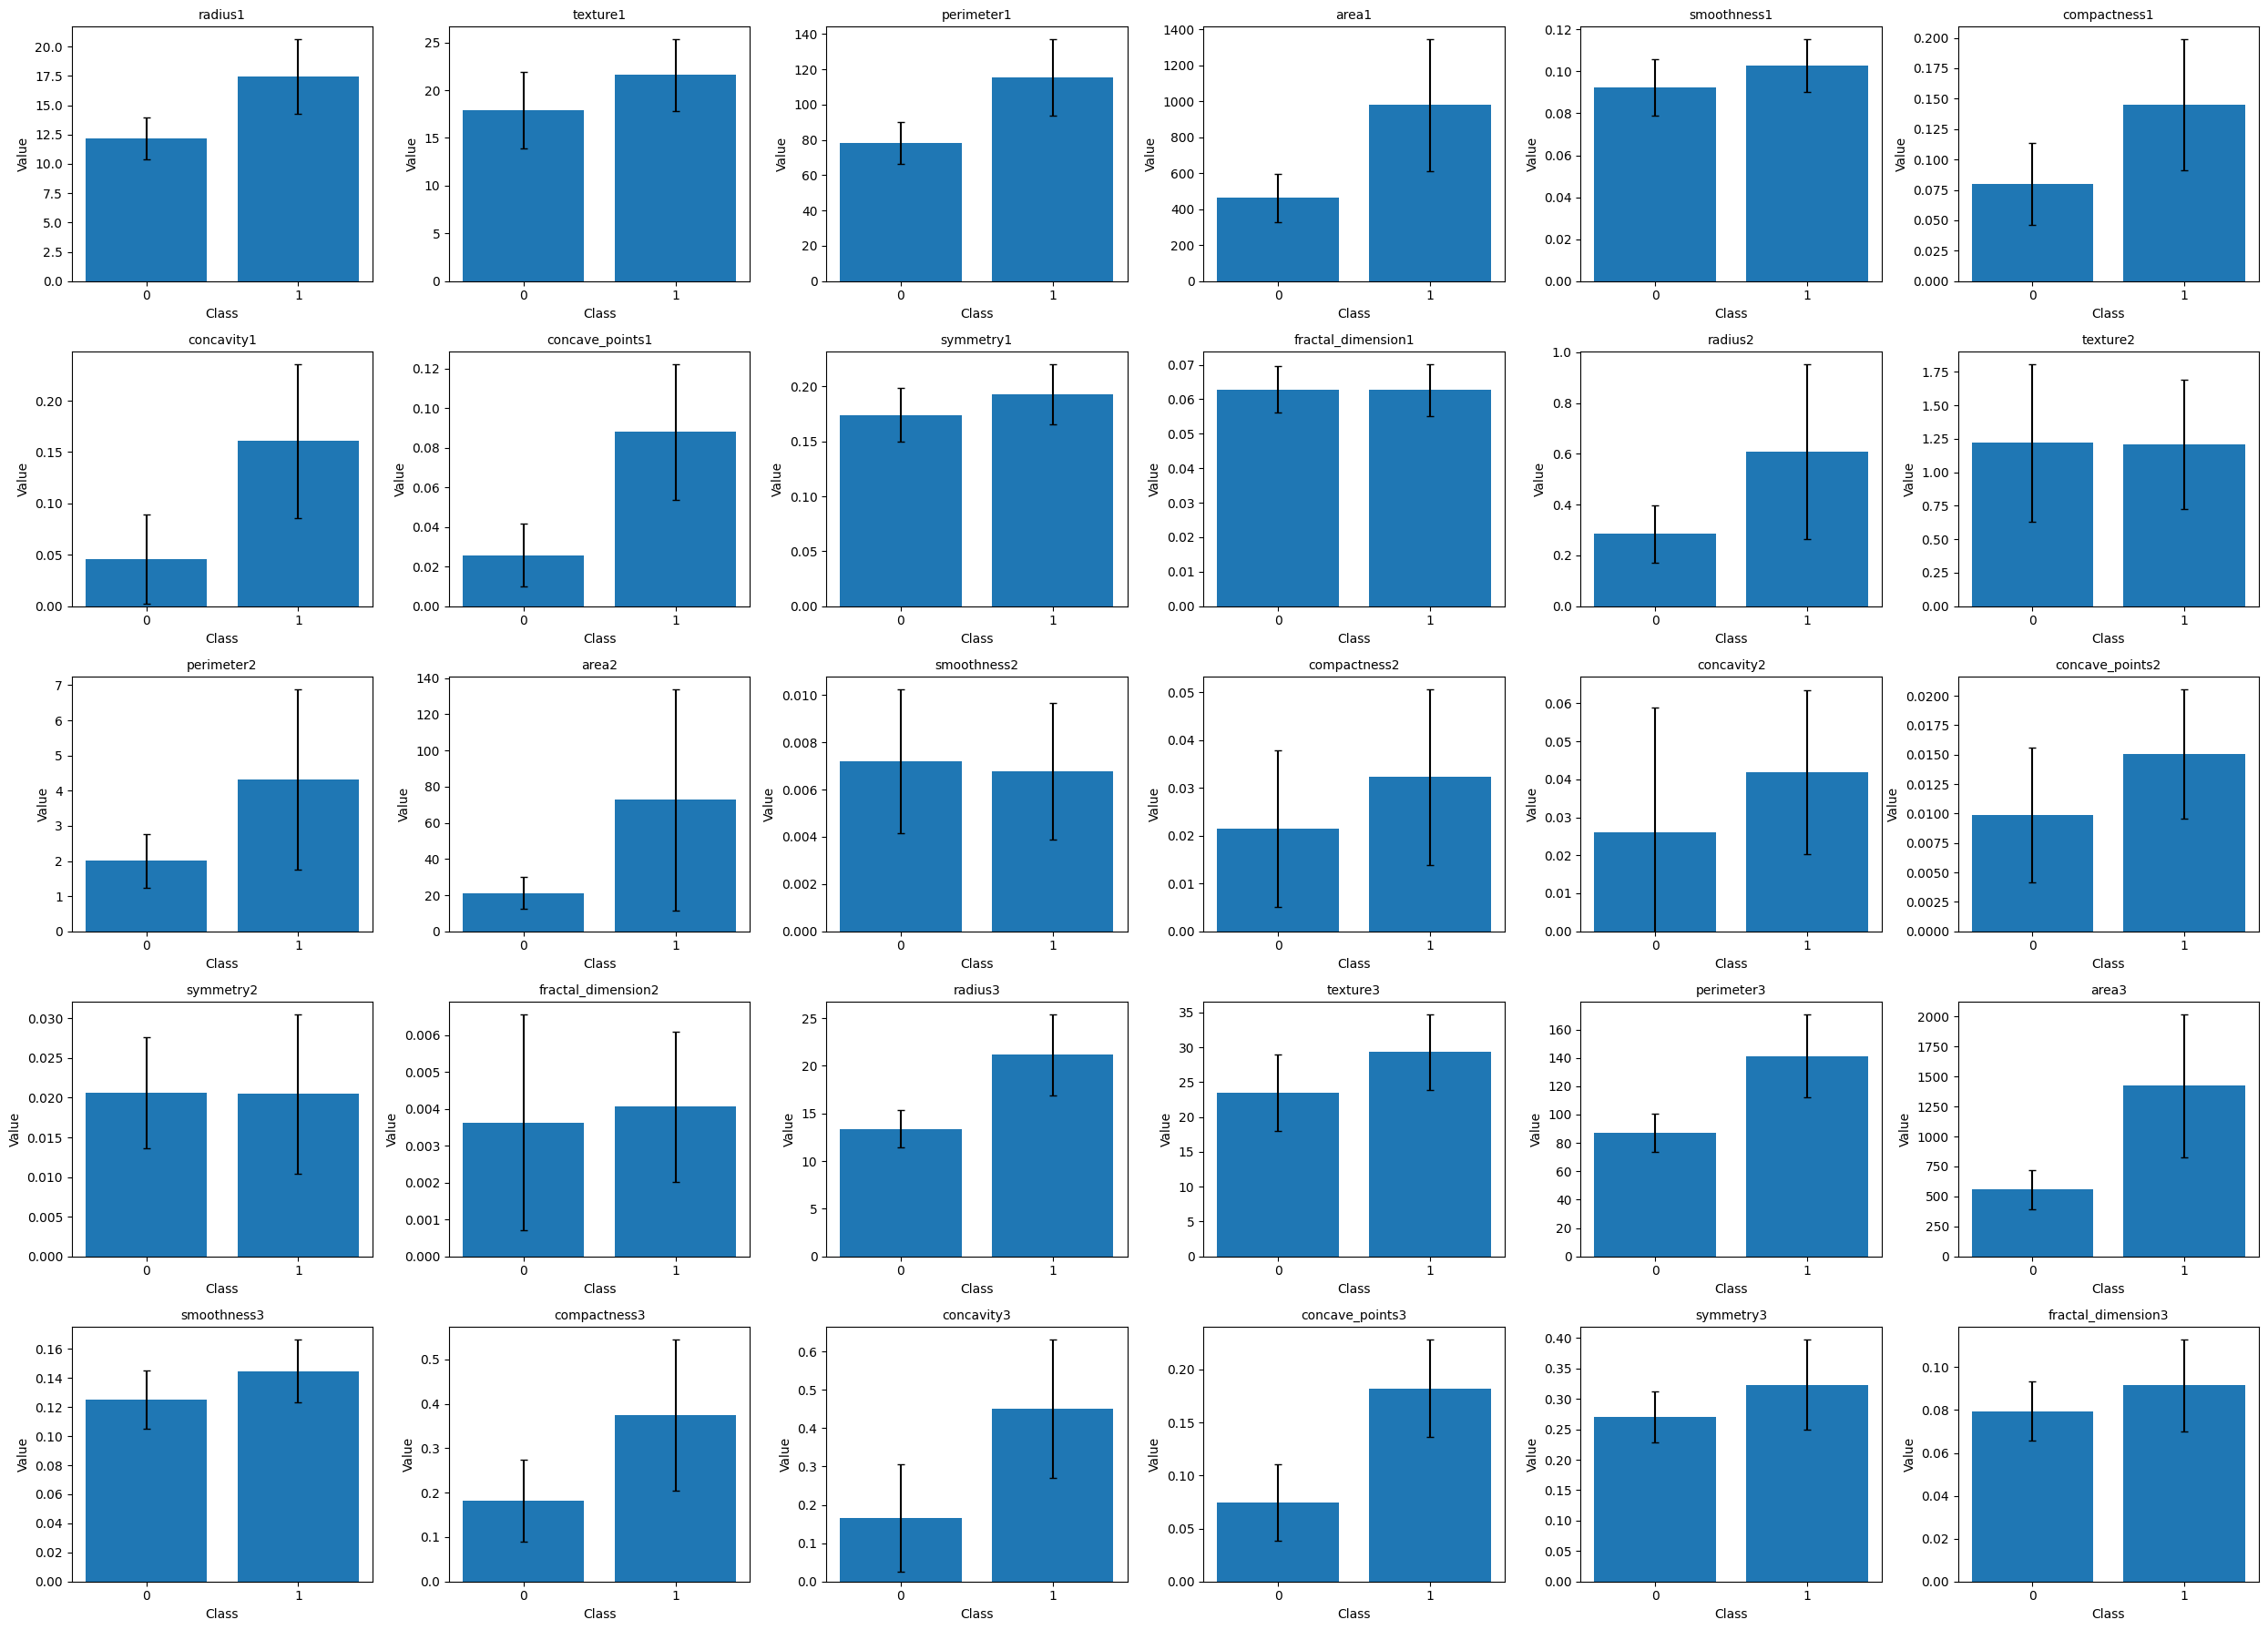

In [6]:
# Bar-plot for each feature

means = X.groupby(y['Diagnosis']).mean()
stds = X.groupby(y['Diagnosis']).std()

n_features = X.shape[1]

n_rows, n_cols = 5, 6
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 18))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].bar(
        x=[0,1],
        height=means[col],
        yerr=stds[col],
        capsize=3,
        tick_label=["0", "1"]
    )
    axes[i].set_title(col, fontsize=10)
    axes[i].set_xlabel("Class")
    axes[i].set_ylabel("Value")
    axes[i].set_ylim(bottom=0)  

plt.tight_layout()



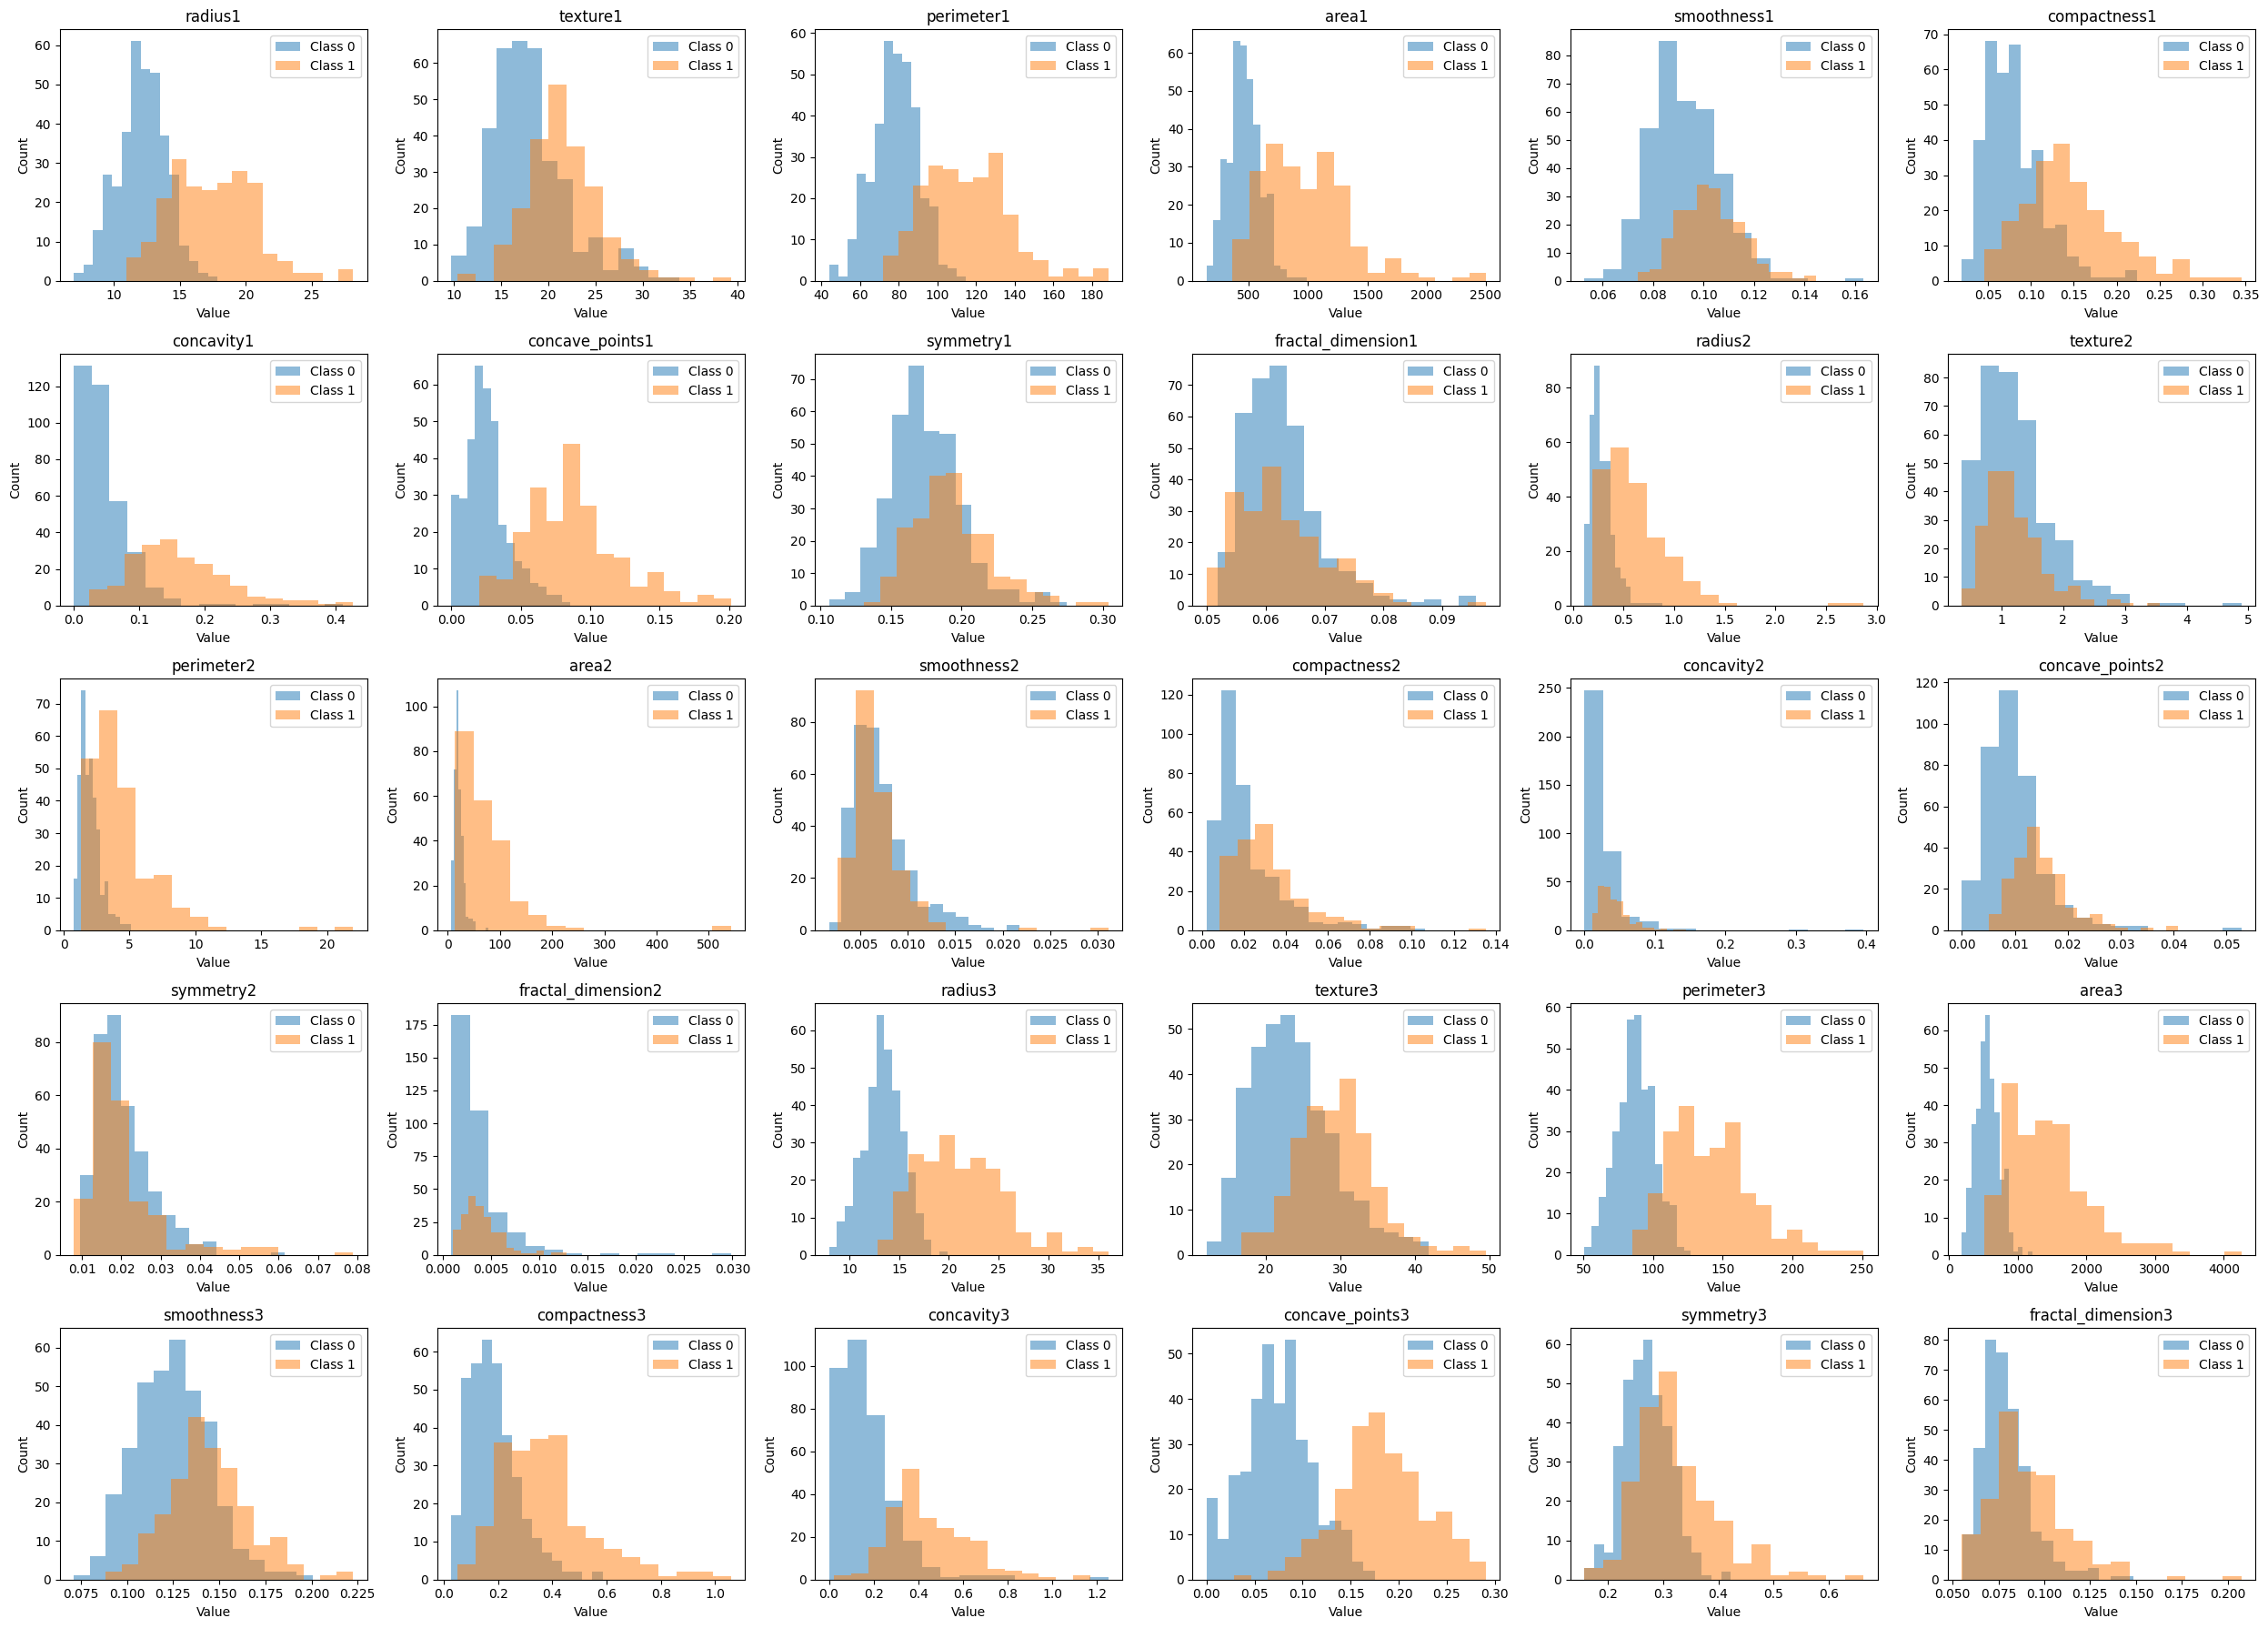

In [7]:
# Histogram for each feature
fig, axes = plt.subplots(n_rows, n_cols, figsize=(25, 18))
axes = axes.flatten()

for i, col in enumerate(X.columns):
    axes[i].hist(X[col][y['Diagnosis']==0], bins=15, alpha=0.5, label='Class 0')
    axes[i].hist(X[col][y['Diagnosis']==1], bins=15, alpha=0.5, label='Class 1')
    axes[i].set_title(col)
    axes[i].set_xlabel("Value")
    axes[i].set_ylabel("Count")
    axes[i].legend()


plt.tight_layout()


Text(0.5, 1.0, 'Correlation between features')

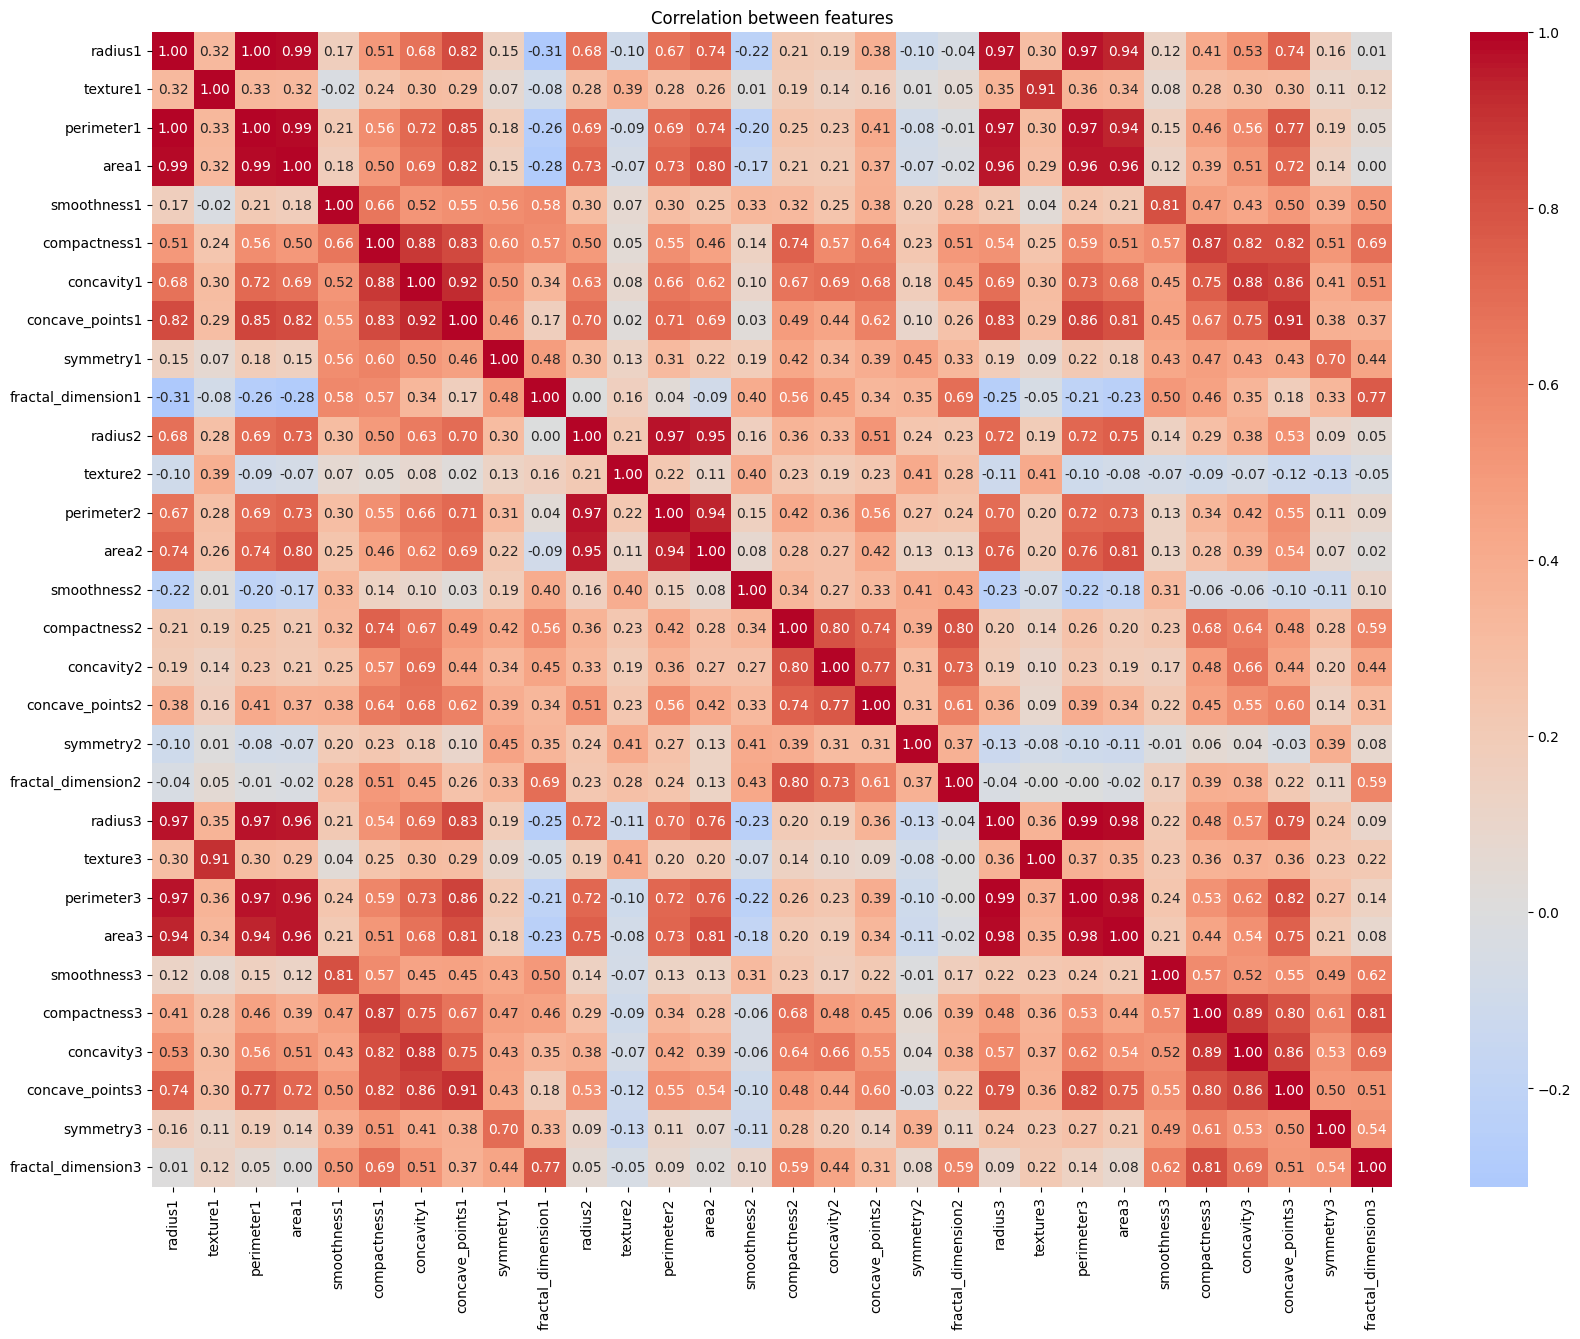

In [8]:
# Correlation between features
corr_matrix = X.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Correlation between features")


In [17]:
# Correlation between features and target
corr_target = X.corrwith(y['Diagnosis'])
print(corr_target)

radius1               0.730029
texture1              0.415185
perimeter1            0.742636
area1                 0.708984
smoothness1           0.358560
compactness1          0.596534
concavity1            0.696360
concave_points1       0.776614
symmetry1             0.330499
fractal_dimension1   -0.012838
radius2               0.567134
texture2             -0.008303
perimeter2            0.556141
area2                 0.548236
smoothness2          -0.067016
compactness2          0.292999
concavity2            0.253730
concave_points2       0.408042
symmetry2            -0.006522
fractal_dimension2    0.077972
radius3               0.776454
texture3              0.456903
perimeter3            0.782914
area3                 0.733825
smoothness3           0.421465
compactness3          0.590998
concavity3            0.659610
concave_points3       0.793566
symmetry3             0.416294
fractal_dimension3    0.323872
dtype: float64


              precision    recall  f1-score   support

           0       0.93      0.90      0.92       357
           1       0.85      0.89      0.87       212

    accuracy                           0.90       569
   macro avg       0.89      0.90      0.89       569
weighted avg       0.90      0.90      0.90       569



Text(0.5, 1.0, 'Confusion Matrix - Simple Classifier that compares one feature with treshold')

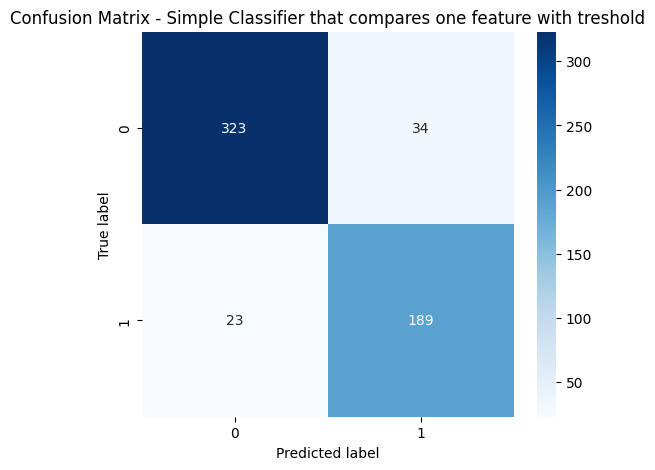

In [23]:
# Comparing one informative feature with treshold
X_single = X['concave_points3']

treshold = 0.125 # chosen based on histograms 

y_pred = (X_single >= treshold).astype(int)

print(classification_report(y['Diagnosis'], y_pred))

cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Simple Classifier that compares one feature with treshold')

In [10]:
# Splitting data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [11]:
# Data Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression')

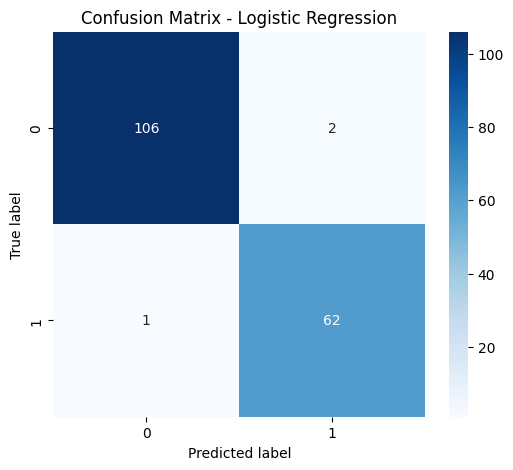

In [12]:
# Logistic Regression
model = LogisticRegressionCV(cv=5, max_iter=1000)
model.fit(X_train_scaled, y_train['Diagnosis'])

y_pred = model.predict(X_test_scaled)
print(classification_report(y_test['Diagnosis'], y_pred))

cm = confusion_matrix(y_test['Diagnosis'], y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Logistic Regression')


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       108
           1       0.94      0.94      0.94        63

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

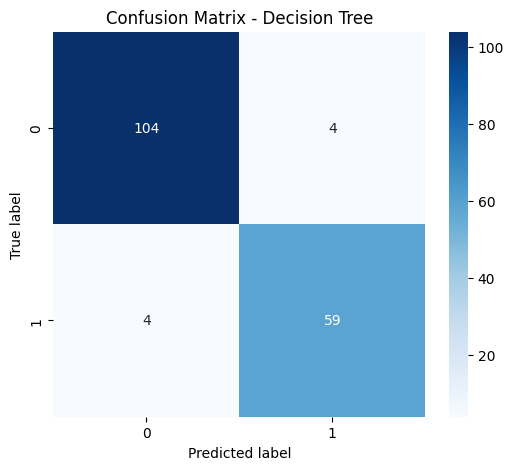

In [24]:
# Decision Tree
# Trees does not need data scaling
model = DecisionTreeClassifier(max_depth=5, random_state=42) 
model.fit(X_train, y_train['Diagnosis'])

y_pred = model.predict(X_test)

print(classification_report(y_test['Diagnosis'], y_pred))

cm = confusion_matrix(y_test['Diagnosis'], y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Decision Tree')


              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.0, 'Confusion Matrix - Decision Tree')

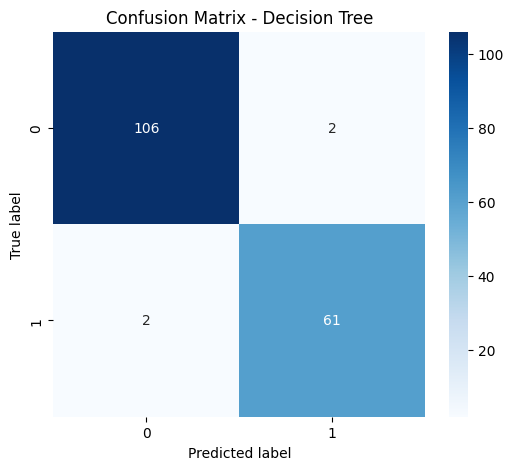

In [32]:
# Support Vector Machine
model = SVC(kernel="rbf")
model.fit(X_train_scaled, y_train['Diagnosis'])

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test['Diagnosis'], y_pred))

cm = confusion_matrix(y_test['Diagnosis'], y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Decision Tree')


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 1.0, 'Confusion Matrix - Logistic Regression with LASSO Regularization')

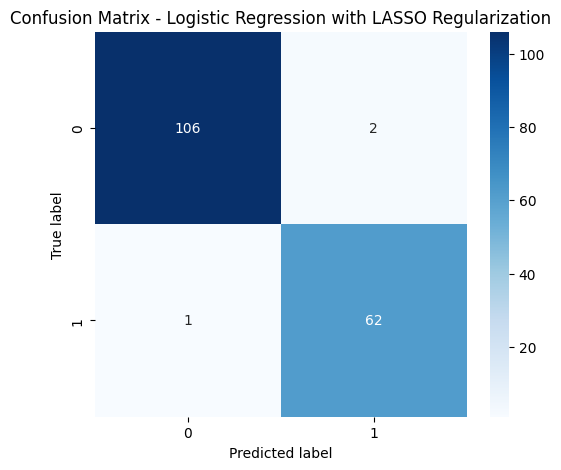

In [38]:
# Logistic Regression with LASSO regularization
model = LogisticRegressionCV(Cs=[0.01,0.1,1,10], cv=5, penalty='l1', solver='saga', max_iter=5000)
model.fit(X_train_scaled, y_train['Diagnosis'])

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test['Diagnosis'], y_pred))

cm = confusion_matrix(y_test['Diagnosis'], y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Logistic Regression with LASSO Regularization')



Epoch 1/100


c:\Users\mm243067m\OneDrive - Univerzitet u Beogradu - Elektrotehnički Fakultet\Radna površina\mu_projekat\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7663 - loss: 0.4851  
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8116 - loss: 0.4415 
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8291 - loss: 0.4066 
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8467 - loss: 0.3808 
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8719 - loss: 0.3581 
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8920 - loss: 0.3376 
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9045 - loss: 0.3196 
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9171 - loss: 0.3021 
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9221 - loss: 0.2857 
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9271 - loss: 0.2705 
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9347 - loss: 0.2559 
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

Text(0.5, 1.0, 'Confusion Matrix - Artificial Neural Network')

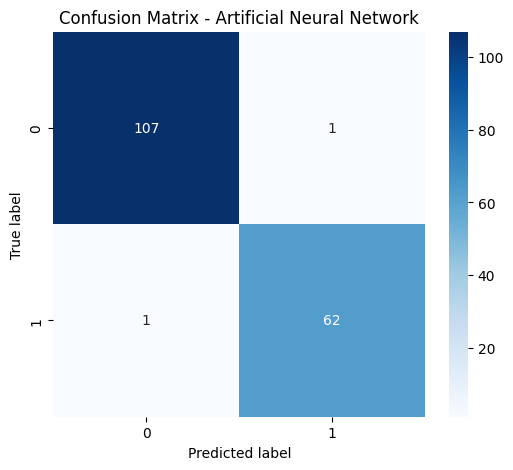

In [45]:
# Artificial Neural Network
model = Sequential([
    Dense(5, activation='relu', input_shape=(X_train_scaled.shape[1],)), 
    Dense(1, activation='sigmoid')  
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train['Diagnosis'], epochs=100, batch_size=32)

y_pred = model.predict(X_test_scaled)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test['Diagnosis'], y_pred))

cm = confusion_matrix(y_test['Diagnosis'], y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Artificial Neural Network')


              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

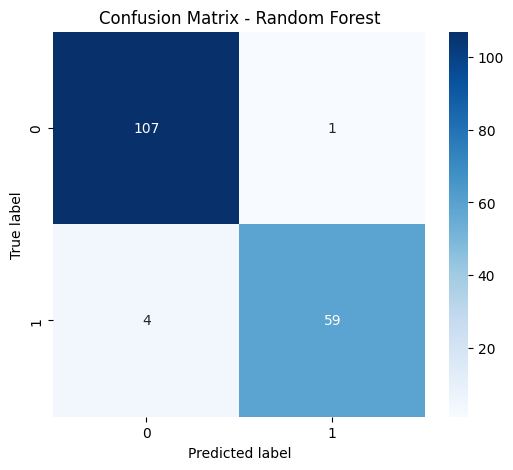

In [70]:
# Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train['Diagnosis'])

y_pred = model.predict(X_test)

print(classification_report(y_test['Diagnosis'], y_pred))

cm = confusion_matrix(y_test['Diagnosis'], y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - Random Forest')

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       108
           1       0.97      0.95      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



Text(0.5, 1.0, 'Confusion Matrix - XGBoost')

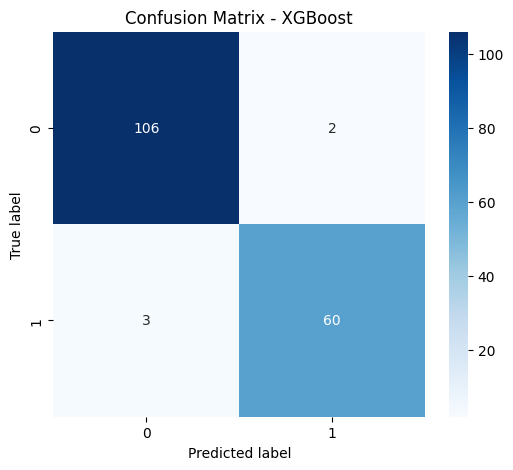

In [61]:
# Gradient Boosting
model = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.5, random_state=42)
model.fit(X_train, y_train['Diagnosis'])

y_pred = model.predict(X_test)

print(classification_report(y_test['Diagnosis'], y_pred))

cm = confusion_matrix(y_test['Diagnosis'], y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['0','1'], yticklabels=['0','1'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix - XGBoost')